#0.1 Basics
https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd "/content/drive/MyDrive/TimeSeriesClass-Fall2024/Week5"

/content/drive/MyDrive/TimeSeriesClass-Fall2024/Week5


In [16]:
%cd data

/content/drive/MyDrive/TimeSeriesClass-Fall2024/Week5/data


In [17]:
ls

online+retail+ii.zip


In [18]:
!unzip 'online+retail+ii.zip' -d 'retail_data'


Archive:  online+retail+ii.zip
 extracting: retail_data/online_retail_II.xlsx  


In [19]:
ls

online+retail+ii.zip  retail_data/


# 0.1 Lets Read the data

In [24]:
%cd retail_data/

/content/drive/MyDrive/TimeSeriesClass-Fall2024/Week5/data/retail_data


In [107]:
import pandas as pd
df = pd.read_excel('online_retail_II.xlsx')


In [108]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [110]:
df.isnull().sum()  # Check missing values
df = df.dropna(subset=['Customer ID', 'Quantity'])  # Drop rows with missing Customer ID or Quantity

In [111]:
df['Customer ID'] = df['Customer ID'].astype(int)

In [112]:
df = df[df['Quantity'] > 0]  # Remove negative quantities

In [113]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  int64         
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 28.0+ MB


In [115]:
df.duplicated().sum()  # Check how many duplicate rows exist
df = df.drop_duplicates()  # Drop duplicates

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400947 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400947 non-null  object        
 1   StockCode    400947 non-null  object        
 2   Description  400947 non-null  object        
 3   Quantity     400947 non-null  int64         
 4   InvoiceDate  400947 non-null  datetime64[ns]
 5   Price        400947 non-null  float64       
 6   Customer ID  400947 non-null  int64         
 7   Country      400947 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.5+ MB


##0.2.1-- Outliers

In [117]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Quantity'] >= Q1 - 1.5 * IQR) & (df['Quantity'] <= Q3 + 1.5 * IQR)]



In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374651 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      374651 non-null  object        
 1   StockCode    374651 non-null  object        
 2   Description  374651 non-null  object        
 3   Quantity     374651 non-null  int64         
 4   InvoiceDate  374651 non-null  datetime64[ns]
 5   Price        374651 non-null  float64       
 6   Customer ID  374651 non-null  int64         
 7   Country      374651 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 25.7+ MB


In [119]:
print("There are", df.shape[0], "rows.")

There are 374651 rows.


In [120]:
df.set_index('InvoiceDate', inplace=True)


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374651 entries, 2009-12-01 07:45:00 to 2010-12-09 20:01:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      374651 non-null  object 
 1   StockCode    374651 non-null  object 
 2   Description  374651 non-null  object 
 3   Quantity     374651 non-null  int64  
 4   Price        374651 non-null  float64
 5   Customer ID  374651 non-null  int64  
 6   Country      374651 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.9+ MB


#0.3: Group by Date: Let’s aggregate the sales data by date for initial time series analysis

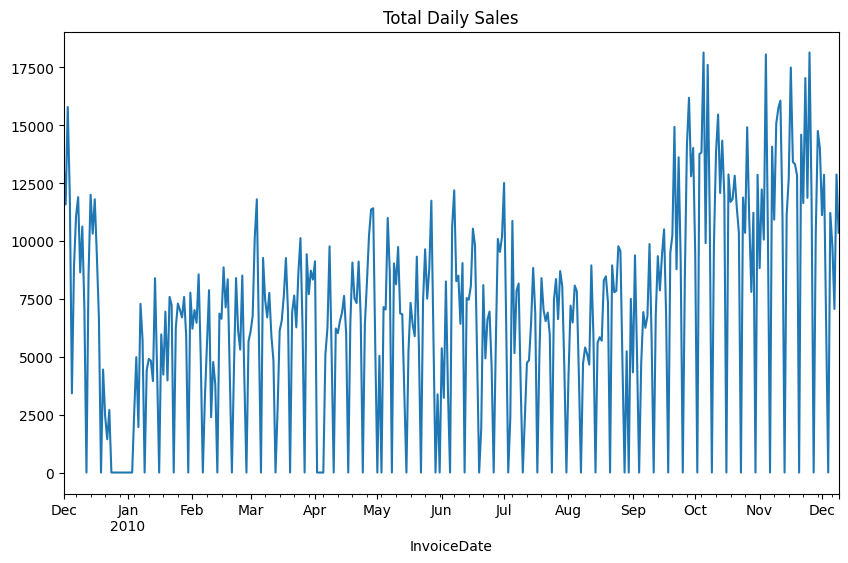

In [122]:
# Ensure the index is set properly
df = df.sort_index()

# Resample and plot daily sales
df.resample('D')['Quantity'].sum().plot(figsize=(10,6), title="Total Daily Sales");

# 0.4 Lets focus on Individual Customers today

In [135]:
df.index.max()

Timestamp('2010-12-09 20:01:00')

In [123]:
cutoff_date = pd.to_datetime('2010-11-30')
past_transactions = df[df.index < cutoff_date]
future_transactions = df[df.index >= cutoff_date]

In [124]:
len(past_transactions)

359304

In [125]:
len(future_transactions)

15347

In [126]:
active_customers = past_transactions['Customer ID'].unique()
future_transactions = future_transactions[future_transactions['Customer ID'].isin(active_customers)]

In [127]:
active_customers

array([13085, 13078, 15362, ..., 17223, 17468, 13955])

the function summary_data_from_transaction_data from the lifetimes library is being used to summarize customer transactions. This function prepares data for models like BG/NBD by summarizing how frequently customers make purchases, how recently they purchased, and the total observation period.

Unfortunately: lifetime does not take datetime index

In [128]:
!pip install lifetimes

In [129]:
past_transactions['TransactionDate'] = past_transactions.index

summary = summary_data_from_transaction_data(
    past_transactions,
    'Customer ID',
    'TransactionDate',  # Use the newly created column
    monetary_value_col='Quantity',
    observation_period_end=past_transactions.index.max()
)


In [130]:
# Ensure monetary values are positive
summary = summary[summary['monetary_value'] > 0]

The BG/NBD (Beta-Geometric/Negative Binomial Distribution) model is a probabilistic model used in customer lifetime value (CLV) predictions. It helps forecast how many purchases a customer will make over a given period. The model assumes that:

Each customer has a specific purchase frequency (modeled by a negative binomial distribution).
Each customer has a probability of "churning" or stopping purchases (modeled by a beta-geometric distribution).
The model estimates recency (how recently the customer purchased) and frequency (how often they purchase) to predict future behavior.

the key metrics used by the summary_data_from_transaction_data function are calculated:

**Frequency**: The number of repeat purchases a customer has made (excludes the first purchase). It is measured in terms of number of transactions.

**Recency**: The time between a customer's first purchase and their last purchase in the observation period.

**T (Time)**: The time between the customer’s first purchase and the end of the observation period.

**Monetary Value**: The average monetary value of the customer’s purchases (in this case, Quantity could be used as a proxy).

These metrics are key for customer lifetime value models like BG/NBD.

In [131]:
summary

,frequency,recency,T,monetary_value
Customer ID,,,,
12346,6.0,196.0,350.0,8.333333
12349,2.0,182.0,214.0,236.000000
12352,1.0,17.0,17.0,111.000000
12356,2.0,44.0,49.0,157.500000
12358,2.0,356.0,356.0,153.000000
...,...,...,...,...
18276,4.0,337.0,354.0,188.250000
18277,2.0,97.0,119.0,135.500000
18283,4.0,276.0,283.0,68.250000


In [150]:
# Purpose of this block:
# Fit two models to predict future customer purchases and expected revenue:
# 1. BG/NBD Model: Forecasts how many purchases a customer will make over a future period (10 days).
#    It uses customer behavior data such as purchase frequency, recency, and observation time.
# 2. Gamma-Gamma Model: Predicts the average monetary value of future purchases for each customer.
#    It uses the customer’s past purchase behavior to estimate future sales revenue.

# Import required classes from the Lifetimes library
from lifetimes import BetaGeoFitter, GammaGammaFitter

# Fit the BG/NBD model to predict future purchases
bgf = BetaGeoFitter(penalizer_coef=0.05)  # Penalizer to avoid overfitting
# Fit using customer frequency, recency, and observation period
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

# Predict purchases for the next 10 days for each customer
t = 10
summary['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, summary['frequency'], summary['recency'], summary['T']
)
summary['predicted_purchases'] = summary['predicted_purchases'].clip(lower=0)  # Ensure no negative values

# Fit the Gamma-Gamma model for predicting monetary value (average spend)
ggf = GammaGammaFitter(penalizer_coef=0.02)
ggf.fit(summary['frequency'], summary['monetary_value'])  # Use customers' past purchase value data

# Predict expected average sales for each customer
summary['expected_avg_sales'] = ggf.conditional_expected_average_profit(
    summary['frequency'], summary['monetary_value']
)
summary['expected_avg_sales'] = summary['expected_avg_sales'].clip(lower=0)  # Ensure no negative sales values


In [155]:
# Purpose:
# 1. Decompose the time series to calculate seasonal indices for each product.
# 2. Adjust the forecasted sales for each product using the seasonal indices.

# Step 1: Aggregate daily sales per product
daily_sales = past_transactions.groupby(['InvoiceDate', 'Description'])['Quantity'].sum().reset_index()

# Step 2: Pivot the data to have products as columns
daily_sales_pivot = daily_sales.pivot(index='InvoiceDate', columns='Description', values='Quantity').fillna(0)

# Step 3: Decompose time series and calculate seasonal indices for each product
seasonal_indices = {}
for product in daily_sales_pivot.columns:
    product_series = daily_sales_pivot[product]

    # Determine the model type based on presence of zeros in sales
    model_type = 'additive' if (product_series == 0).any() else 'multiplicative'

    # Perform seasonal decomposition if there are enough data points
    if len(product_series.dropna()) >= 90:
        try:
            decomposition = seasonal_decompose(product_series, model=model_type, period=30)
            seasonal = decomposition.seasonal

            # Calculate seasonal index for forecast dates
            forecast_dates = pd.date_range(start=cutoff_date, periods=t)
            forecast_seasonal = seasonal[seasonal.index.isin(forecast_dates)]
            seasonal_index = forecast_seasonal.mean() if not forecast_seasonal.empty else 0

            # Store the seasonal index for the product
            seasonal_indices[product] = {'index': seasonal_index, 'model': model_type}
        except Exception:
            # Handle any errors in decomposition and default to no adjustment
            seasonal_indices[product] = {'index': 0 if model_type == 'additive' else 1, 'model': model_type}

# Step 4: Function to adjust sales based on seasonal index
def adjust_sales(row):
    product = row['Description']
    expected_sales = row['expected_sales']

    # Get seasonal adjustment info for the product, defaulting to additive model
    seasonal_info = seasonal_indices.get(product, {'index': 0, 'model': 'additive'})
    seasonal_index = seasonal_info['index']
    model_type = seasonal_info['model']

    # Calculate adjusted sales based on model type
    if model_type == 'additive':
        adjusted_sales = expected_sales + seasonal_index
    else:
        adjusted_sales = expected_sales * seasonal_index

    return max(adjusted_sales, 0)

# Step 5: Calculate total expected sales for each customer using predicted purchases and expected average sales
summary['expected_sales'] = summary['predicted_purchases'] * summary['expected_avg_sales']
summary['expected_sales'] = summary['expected_sales'].clip(lower=0)

# Step 6: Merge expected sales with customer-product data and apply seasonal adjustment
customer_product = past_transactions.groupby(['Customer ID', 'Description'])['Quantity'].sum().reset_index()
customer_product = customer_product.merge(
    summary[['expected_sales', 'frequency', 'recency', 'monetary_value']],
    left_on='Customer ID', right_index=True, how='left'
)

# Step 7: Apply seasonal adjustment to customer-product data
customer_product['forecasted_sales'] = customer_product.apply(adjust_sales, axis=1)

# Now, the forecasted sales for each customer-product combination are ready.


In [157]:
# Step 1: Group actual sales from the future_transactions dataset (validation data)
actual_sales = future_transactions.groupby('Description')['Quantity'].sum().reset_index()

# Step 2: Merge the forecasted sales with actual sales for comparison
validation_df = customer_product.merge(actual_sales, on='Description', how='left')
validation_df['Quantity'].fillna(0, inplace=True)  # Fill missing actual sales with 0

# Step 3: Calculate APE (Absolute Percentage Error)
validation_df['APE'] = np.where(
    validation_df['Quantity'] == 0,  # Avoid division by zero
    np.nan,
    np.abs((validation_df['Quantity'] - validation_df['forecasted_sales']) / validation_df['Quantity'])
)

# Step 4: Calculate MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(validation_df['Quantity'], validation_df['forecasted_sales'])
rmse = np.sqrt(mean_squared_error(validation_df['Quantity'], validation_df['forecasted_sales']))

# Step 5: Print the validation results
print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")


KeyError: 'Quantity'